In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Load US Unemployment Data into Pandas
ue_data_df = pd.read_csv("../data_files/internet_sources/Complete_UR_Download.csv", delimiter = ';')
ue_data_df.head()

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Unemployment Rate,1948-01-31T00:00:00,3.4,Monthly,USURTOT,2012-02-23T11:41:00
1,United States,Unemployment Rate,1948-02-29T00:00:00,3.8,Monthly,USURTOT,2012-02-23T11:41:00
2,United States,Unemployment Rate,1948-03-31T00:00:00,4.0,Monthly,USURTOT,2012-02-23T11:41:00
3,United States,Unemployment Rate,1948-04-30T00:00:00,3.9,Monthly,USURTOT,2012-02-23T11:41:00
4,United States,Unemployment Rate,1948-05-31T00:00:00,3.5,Monthly,USURTOT,2012-02-23T11:41:00


In [3]:
#Create 2008 Housing Crisis Dataframe
subset_08_df = ue_data_df.loc[ue_data_df["DateTime"] >= '2008-12-31T00:00:00']
subset_08_df = subset_08_df.loc[subset_08_df["DateTime"] <= '2009-02-31T00:00:00']
subset_08_df = subset_08_df[['DateTime','Value']]
subset_08_df = subset_08_df.rename(columns={'DateTime':'Date Time', 'Value':'Unemployment Rate'})
subset_08_df

,Date Time,Unemployment Rate
731,2008-12-31T00:00:00,7.3
732,2009-01-31T00:00:00,7.8
733,2009-02-28T00:00:00,8.3


In [4]:
#Create 2020 COVID-19 Crisis Dataframe
subset_20_df = ue_data_df.loc[ue_data_df["DateTime"] >= '2020-01-01T00:00:00']
subset_20_df = subset_20_df.loc[subset_20_df["DateTime"] <= '2020-04-31T00:00:00']
subset_20_df = subset_20_df[['DateTime','Value']]
subset_20_df = subset_20_df.rename(columns={'DateTime':'Date Time', 'Value':'Unemployment Rate'})
subset_20_df

,Date Time,Unemployment Rate
864,2020-01-31T00:00:00,3.6
865,2020-02-29T00:00:00,3.5
866,2020-03-31T00:00:00,4.4


In [5]:
# Export Unemployment Dataframes to .csv files
subset_08_df.to_csv("../data_files/output/subset_08.csv", index=False, header=True)
subset_20_df.to_csv("../data_files/output/subset_20.csv", index=False, header=True)

In [6]:
# Load COVID-19 Data into Pandas
cv19_df = pd.read_csv("../data_files/internet_sources/CovidStatesData.csv")
cv19_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
#Create COVID-19 Dataframe
subset_cv19_df = cv19_df.loc[cv19_df['date'] >= '2020-02-01']
subset_cv19_df = subset_cv19_df.loc[subset_cv19_df['date'] <= '2020-04-31']
subset_cv19_df = subset_cv19_df[['date','state','cases','deaths']]
subset_cv19_df = subset_cv19_df.rename(columns={'date':'Date', 'state':'State', 'cases':'Cases', 'deaths':'Deaths'})
subset_cv19_df

,Date,State,Cases,Deaths
32,2020-02-01,Arizona,1,0
33,2020-02-01,California,3,0
34,2020-02-01,Illinois,2,0
35,2020-02-01,Massachusetts,1,0
36,2020-02-01,Washington,1,0
...,...,...,...,...
2268,2020-04-12,Virginia,5274,141
2269,2020-04-12,Washington,10411,511
2270,2020-04-12,West Virginia,615,8
2271,2020-04-12,Wisconsin,3341,145


In [8]:
#Group COVID-19 data by date to get US totals
grouped_cv19 = subset_cv19_df.groupby(["Date"])
cv19_datesums_df = grouped_cv19.sum()
cv19_datesums_df

,Cases,Deaths
Date,,
2020-02-01,8,0
2020-02-02,11,0
2020-02-03,11,0
2020-02-04,11,0
2020-02-05,12,0
...,...,...
2020-04-08,429319,14803
2020-04-09,463684,16674
2020-04-10,496912,18712


In [9]:
#Move Date data from index to column for plotting
cv19_date_df = cv19_datesums_df.reset_index()
cv19_date_df

,Date,Cases,Deaths
0,2020-02-01,8,0
1,2020-02-02,11,0
2,2020-02-03,11,0
3,2020-02-04,11,0
4,2020-02-05,12,0
...,...,...,...
67,2020-04-08,429319,14803
68,2020-04-09,463684,16674
69,2020-04-10,496912,18712
70,2020-04-11,528405,20575


In [10]:
#Set variables for line plots
cases_x = cv19_date_df["Date"].values.tolist()
deaths_x = cv19_date_df["Date"].values.tolist()
cases_y = cv19_date_df["Cases"].values.tolist()
deaths_y = cv19_date_df["Deaths"].values.tolist()

In [11]:
#Create weekly set of dates for plotting
div = int(round(len(cases_x) / 7,0))
div
x_axis = []
for x in range(div):
    x_axis.append(cases_x[x*7])

print(x_axis)

['2020-02-01', '2020-02-08', '2020-02-15', '2020-02-22', '2020-02-29', '2020-03-07', '2020-03-14', '2020-03-21', '2020-03-28', '2020-04-04']


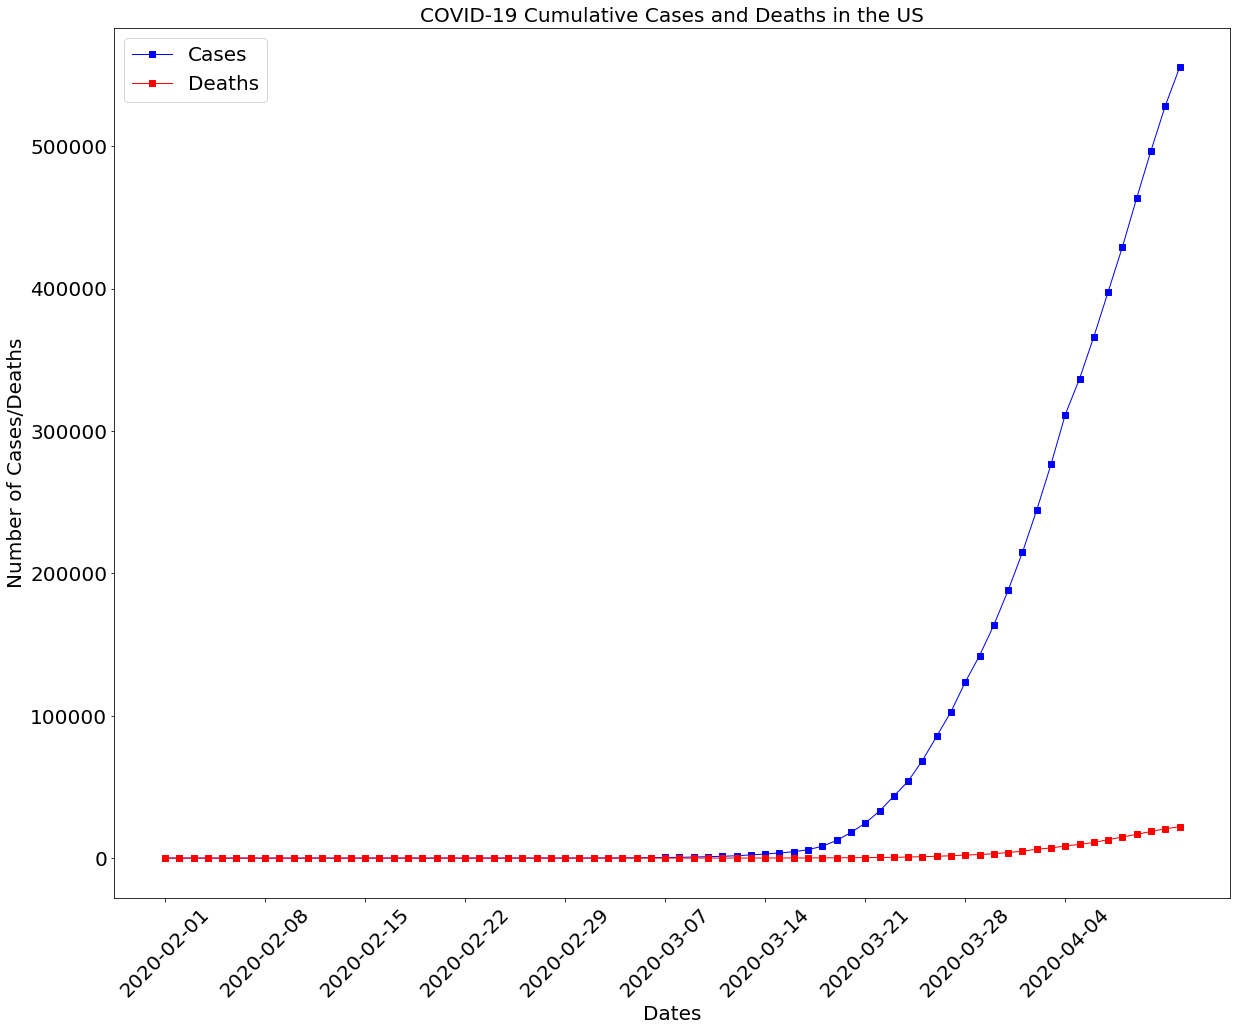

In [12]:
# Plot the COVID-19 cases, deaths by date
plt.figure(figsize=(20,16))
cases, = plt.plot(cases_x, cases_y, marker="s", color="blue", linewidth=1, label="Cases")
deaths, = plt.plot(deaths_x, deaths_y, marker="s", color="Red", linewidth=1, label="Deaths")
plt.legend(handles=[cases, deaths], loc="best", fontsize=20)
plt.xlabel("Dates", size=20)
plt.xticks(x_axis, rotation=45, size=20)
plt.yticks(size=20)
plt.ylabel("Number of Cases/Deaths", size=20)
plt.title("COVID-19 Cumulative Cases and Deaths in the US", size=20)
plt.savefig("../output/COVID_LineChart.png")
plt.show()

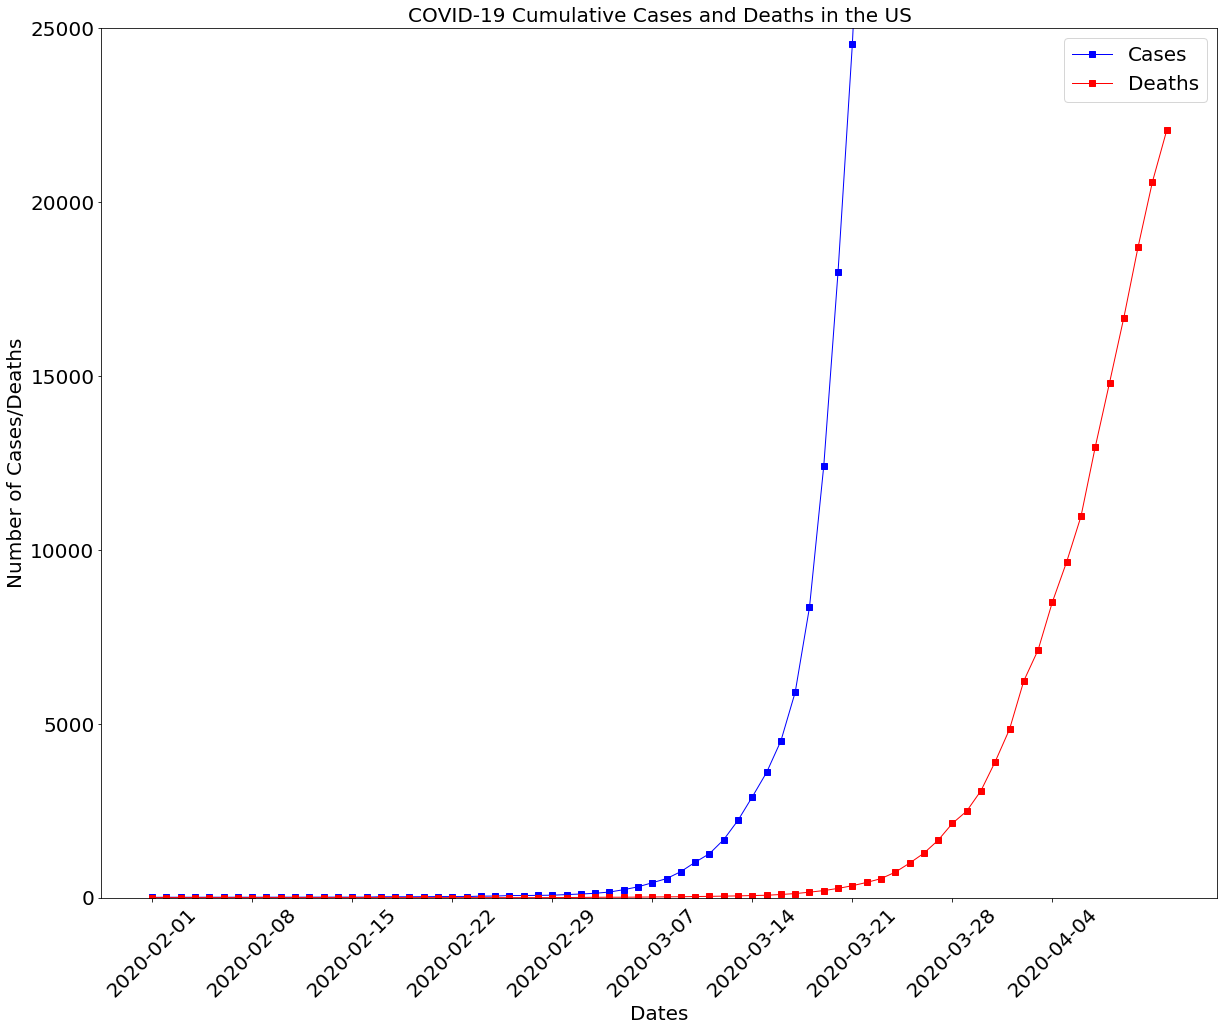

In [13]:
# Plot the COVID-19 cases, deaths by date, capped at 25,000 to better show deaths curve
plt.figure(figsize=(20,16))
cases, = plt.plot(cases_x, cases_y, marker="s", color="blue", linewidth=1, label="Cases")
deaths, = plt.plot(deaths_x, deaths_y, marker="s", color="Red", linewidth=1, label="Deaths")
plt.legend(handles=[cases, deaths], loc="best", fontsize=20)
plt.title("COVID-19 Cumulative Cases and Deaths in the US", size=20)
plt.xticks(x_axis, rotation=45, size=20)
plt.yticks(size=20)
plt.xlabel("Dates", size=20)
plt.ylabel("Number of Cases/Deaths", size=20)
plt.ylim(0, 25000)
plt.savefig("../output/COVID_LineChart_capped.png")
plt.show()